## Particle Simulations Report

Before any simulations can be run, I need to import the relevant display functions and run the gas_2d script

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [33]:
%matplotlib inline
from aux_functions import animate_trajectory, display_particle, display_vecs, display_trajectory

In [3]:
%run gas_2d.py

Now I am going to import the file 'long_simulation', which is a simulation of 200 particles of mass 1 kg and radius 1m in a box of length 100 m. The particles are given random initial positions and momenta.

In [4]:
import pickle
with open('long_simulation2.dat','rb') as data_f:
    loaded_sim = pickle.load(data_f)

To determine the total kinetic energy of the system as a function of time, I first need to define kinetic energy and time functions

In [5]:
def KE(sim):
    "Gives the total kinetic energy of the system for each step in the simulation"
    KE=[]
    for i in range(0,len(sim.trajectory)):
        step=0
        for j in sim.trajectory[i]:
            step=step +0.5*j.mass*j.velocity().norm()**2
        KE.append(step)
    return KE

In [6]:
def time(sim):
    "Gives the time of each step"
    time=[]
    time_interval=sim.dt
    for i in range(0,len(sim.trajectory)):
        time.append(i*time_interval)
    return time

KE below is a list of the total kinetic energies of the system in each step

In [7]:
KE=KE(loaded_sim)

time below is a list of times associated with each of the kinetic energy steps

In [8]:
time=time(loaded_sim)

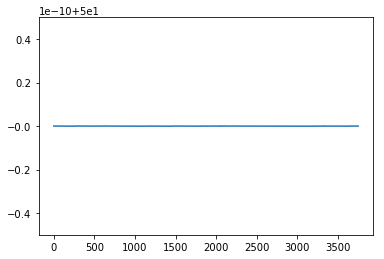

In [9]:
plot(time,KE)

In [12]:
stdev=[]
for i in range(len(loaded_sim.trajectory)):
    velocities=[]
    for j in loaded_sim.trajectory[i]:
        velocities.append(j.velocity().norm())
    stdev.append(std(array(velocities)))

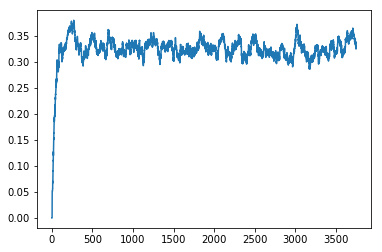

In [13]:
plot(time,stdev)

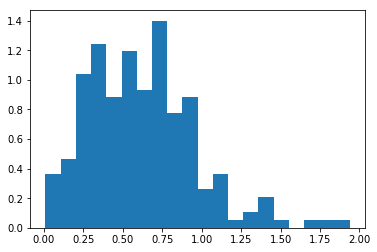

In [37]:
from ipywidgets import interact
from matplotlib.pyplot import *

@interact(t=(0,15000,1))
def plot_speeds(t):
    speeds=[]
    for i in loaded_sim.trajectory[t]:
        speeds.append(i.velocity().norm())
    hist(speeds, bins=20, normed=True)

In [61]:
v=linspace(0,10,200)
M_Bdist=(v/Avg_E)*exp(-v**2/2*Avg_E)

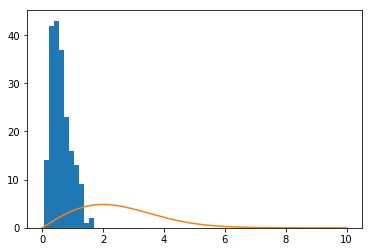

In [62]:
eqm_time=loaded_sim.trajectory[15000]
speed_list=[]
for i in eqm_time:
    speed_list.append(i.velocity().norm())
hist(speed_list, bins=10)
plot(v,M_Bdist)

(array([  5.,   5.,  14.,  36.,  38.,  39.,  33.,  18.,   6.,   6.]),
 array([-1.35018583, -1.08360251, -0.8170192 , -0.55043588, -0.28385257,
        -0.01726925,  0.24931406,  0.51589738,  0.78248069,  1.04906401,
         1.31564733]),
 <a list of 10 Patch objects>)

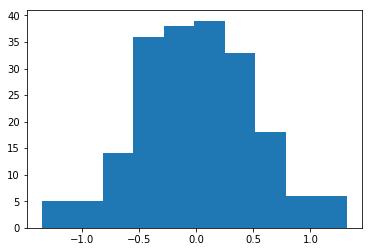

In [42]:
xspeed_list=[]
for i in eqm_time:
    xspeed_list.append(i.velocity().x)
hist(xspeed_list, bins=10)


In [48]:
Energy=0
for i in eqm_time:
    Energy=Energy +0.5*i.mass*i.velocity().norm()**2

In [50]:
Avg_E=Energy/200
Avg_E

0.25

In [51]:
Temp=Avg_E/1.38E-23
Temp

1.8115942028985506e+22